### Join orders with: details, timestamps, stores and customers

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = 10000

In [2]:
orders = pd.read_csv("002-orders-joined-stores-customers.csv", low_memory=False)
orders = orders.set_index("order_id")
print("Total orders: %d" % len(orders))

Total orders: 416807


In [3]:
orders.head(100)

,order_status,order_amount,order_volume,order_deliver_at_start,order_deliver_at_end,order_paid_at,order_fulfillment_type,store_id,courier_id,picker_id,customer_id,items_total,items_with_variable_weight,first_touched_at,last_touched_at,order_opened_at,order_first_detail_picked_at,order_last_detail_picked_at,order_first_try_pay_at,order_delivered_at,store_name,store_province,store_lat,store_lng,store_area,store_ref_id,customer_province,customer_lat,customer_lng,customer_area,customer_ztl,customer_ref_id,customer_has_subscription,customer_created_at,customer_updated_at
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000,600,13.00,0.0,2015-05-14 13:00:00,2015-05-14 13:30:00,2015-05-14 13:06:45,1,2,4302,None,2,2,0,None,None,None,None,None,None,None,burger king,VR,45.434651,10.992421,None,None,VR,45.432496,10.987471,None,0,None,0,2015-05-14 12:10:29,2015-05-14 12:10:29
20002,600,12.00,0.0,2015-05-14 13:30:00,2015-05-14 14:00:00,2015-05-14 13:28:44,1,4,4302,None,4,2,0,None,None,None,None,None,None,None,hokaido,VR,45.433053,10.984298,None,None,VR,45.432496,10.987471,None,0,None,0,2015-05-14 12:16:29,2015-05-14 12:16:29
20004,600,32.00,0.0,2015-05-14 13:30:00,2015-05-14 14:00:00,2015-05-14 13:51:43,1,6,4302,None,6,2,0,None,None,None,None,None,None,None,kobe,VR,45.433590,10.989552,None,None,VR,45.432496,10.987471,None,0,None,0,2015-05-14 12:25:15,2015-05-14 12:25:15
20006,600,15.00,0.0,2015-05-14 13:30:00,2015-05-14 14:00:00,2015-05-14 14:24:50,1,8,4302,None,8,2,0,None,None,None,None,None,None,None,sakura verona,VR,45.435770,10.991580,None,None,VR,45.432855,10.986569,None,0,None,0,2015-05-14 12:26:36,2015-05-14 12:26:36
20008,600,6.80,0.0,2015-05-14 19:00:00,2015-05-14 19:30:00,2015-05-14 18:42:23,1,10,4302,None,10,3,0,None,None,None,None,None,None,None,burger king,VR,45.434651,10.992421,None,None,VR,45.432855,10.986569,None,0,None,0,2015-05-14 17:50:46,2015-05-14 17:50:46
20010,600,8.90,0.0,2015-05-14 20:00:00,2015-05-14 20:30:00,2015-05-14 20:13:06,1,12,12029,None,12,3,0,None,None,None,None,None,None,None,burger king,VA,45.598447,8.918527,None,None,VA,45.607887,8.912186,None,0,None,0,2015-05-14 17:53:46,2015-05-14 17:53:46
20012,600,9.20,0.0,2015-05-15 14:00:00,2015-05-15 14:30:00,2015-05-15 14:07:18,1,14,3081,None,14,2,0,None,None,None,None,None,None,None,burger king,VE,45.507530,12.238552,None,None,VE,45.484393,12.242905,None,0,None,0,2015-05-15 12:51:26,2015-05-15 12:51:26
20016,600,9.10,0.0,2015-05-15 21:00:00,2015-05-15 21:30:00,2015-05-15 20:53:19,1,18,3777,None,18,3,0,None,None,None,None,None,None,None,burger king,PI,43.723947,10.392348,None,None,PI,43.717689,10.404166,None,0,None,0,2015-05-15 19:30:16,2015-05-15 19:30:16
20028,600,12.60,0.0,2015-05-18 18:30:00,2015-05-18 19:00:00,2015-05-18 18:01:05,1,30,13864,None,30,3,0,None,None,None,None,None,None,None,burger king,BO,44.495445,11.338646,None,None,BO,44.493937,11.332256,None,0,None,0,2015-05-18 13:19:15,2015-05-18 13:19:15


In [4]:
def pd_cast_datetime(df, column):
    """ Casts a string column to a date column, assumes format is recognizable """
    df[column] = pd.to_datetime(df[column], infer_datetime_format=True, errors='coerce')

def pd_augment_date(df, column):
    """ Splits a datetime column into year, month, etc. Removes original column """
    pd_cast_datetime(df, column)
    loc = df.columns.get_loc(column)+1
    # create separate columns for each parameter
    df.insert(loc, column + ".minute", df[column].apply(lambda ts: ts.minute))
    df.insert(loc, column + ".hour", df[column].apply(lambda ts: ts.hour))
    df.insert(loc, column + ".day", df[column].apply(lambda ts: ts.day))
    df.insert(loc, column + ".month", df[column].apply(lambda ts: ts.month))
    df.insert(loc, column + ".year", df[column].apply(lambda ts: ts.year))
    df.insert(loc, column + ".dayofweek", df[column].apply(lambda ts: ts.dayofweek))
    # some columns are integers (like hour, minute), some are categories (like month)
    df[column + ".year"] = df[column + ".year"].astype("category")
    df[column + ".month"] = df[column + ".month"].astype("category")
    df[column + ".day"] = df[column + ".day"].astype("category")
    df[column + ".dayofweek"] = df[column + ".dayofweek"].astype("category")
    df.drop([column], axis=1, inplace=True)
    
def pd_timediff_min(df, column_start, column_end, column_diff):
    """ Creates column with difference between times in minutes """
    pd_cast_datetime(df, column_start)
    pd_cast_datetime(df, column_end)
    df[column_diff] = df[column_end] - orders[column_start]
    df[column_diff] = (df[column_diff].dt.total_seconds() / 60.0)


In [5]:
# calculate time for picking, paying and delivering order
pd_timediff_min(orders, "order_first_detail_picked_at", "order_last_detail_picked_at", "pick_time.min")
pd_timediff_min(orders, "order_last_detail_picked_at", "order_first_try_pay_at", "pay_time.min")
pd_timediff_min(orders, "order_last_detail_picked_at", "order_paid_at", "pay_time2.min")
pd_timediff_min(orders, "order_first_try_pay_at", "order_delivered_at", "deliver_time.min")
# meglio usare paid_at in order

In [6]:
# augment delivery window dates to capture weekly and seasonal patterns
pd_augment_date(orders, "order_deliver_at_start")

In [7]:
# see some samples
orders.head(10)

,order_status,order_amount,order_volume,order_deliver_at_start.dayofweek,order_deliver_at_start.year,order_deliver_at_start.month,order_deliver_at_start.day,order_deliver_at_start.hour,order_deliver_at_start.minute,order_deliver_at_end,order_paid_at,order_fulfillment_type,store_id,courier_id,picker_id,customer_id,items_total,items_with_variable_weight,first_touched_at,last_touched_at,order_opened_at,order_first_detail_picked_at,order_last_detail_picked_at,order_first_try_pay_at,order_delivered_at,store_name,store_province,store_lat,store_lng,store_area,store_ref_id,customer_province,customer_lat,customer_lng,customer_area,customer_ztl,customer_ref_id,customer_has_subscription,customer_created_at,customer_updated_at,pick_time.min,pay_time.min,pay_time2.min,deliver_time.min
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000,600,13.0,0.0,3,2015,5,14,13,0,2015-05-14 13:30:00,2015-05-14 13:06:45,1,2,4302,None,2,2,0,None,None,None,NaT,NaT,NaT,NaT,burger king,VR,45.434651,10.992421,None,None,VR,45.432496,10.987471,None,0,None,0,2015-05-14 12:10:29,2015-05-14 12:10:29,NaN,NaN,NaN,NaN
20002,600,12.0,0.0,3,2015,5,14,13,30,2015-05-14 14:00:00,2015-05-14 13:28:44,1,4,4302,None,4,2,0,None,None,None,NaT,NaT,NaT,NaT,hokaido,VR,45.433053,10.984298,None,None,VR,45.432496,10.987471,None,0,None,0,2015-05-14 12:16:29,2015-05-14 12:16:29,NaN,NaN,NaN,NaN
20004,600,32.0,0.0,3,2015,5,14,13,30,2015-05-14 14:00:00,2015-05-14 13:51:43,1,6,4302,None,6,2,0,None,None,None,NaT,NaT,NaT,NaT,kobe,VR,45.433590,10.989552,None,None,VR,45.432496,10.987471,None,0,None,0,2015-05-14 12:25:15,2015-05-14 12:25:15,NaN,NaN,NaN,NaN
20006,600,15.0,0.0,3,2015,5,14,13,30,2015-05-14 14:00:00,2015-05-14 14:24:50,1,8,4302,None,8,2,0,None,None,None,NaT,NaT,NaT,NaT,sakura verona,VR,45.435770,10.991580,None,None,VR,45.432855,10.986569,None,0,None,0,2015-05-14 12:26:36,2015-05-14 12:26:36,NaN,NaN,NaN,NaN
20008,600,6.8,0.0,3,2015,5,14,19,0,2015-05-14 19:30:00,2015-05-14 18:42:23,1,10,4302,None,10,3,0,None,None,None,NaT,NaT,NaT,NaT,burger king,VR,45.434651,10.992421,None,None,VR,45.432855,10.986569,None,0,None,0,2015-05-14 17:50:46,2015-05-14 17:50:46,NaN,NaN,NaN,NaN
20010,600,8.9,0.0,3,2015,5,14,20,0,2015-05-14 20:30:00,2015-05-14 20:13:06,1,12,12029,None,12,3,0,None,None,None,NaT,NaT,NaT,NaT,burger king,VA,45.598447,8.918527,None,None,VA,45.607887,8.912186,None,0,None,0,2015-05-14 17:53:46,2015-05-14 17:53:46,NaN,NaN,NaN,NaN
20012,600,9.2,0.0,4,2015,5,15,14,0,2015-05-15 14:30:00,2015-05-15 14:07:18,1,14,3081,None,14,2,0,None,None,None,NaT,NaT,NaT,NaT,burger king,VE,45.507530,12.238552,None,None,VE,45.484393,12.242905,None,0,None,0,2015-05-15 12:51:26,2015-05-15 12:51:26,NaN,NaN,NaN,NaN
20016,600,9.1,0.0,4,2015,5,15,21,0,2015-05-15 21:30:00,2015-05-15 20:53:19,1,18,3777,None,18,3,0,None,None,None,NaT,NaT,NaT,NaT,burger king,PI,43.723947,10.392348,None,None,PI,43.717689,10.404166,None,0,None,0,2015-05-15 19:30:16,2015-05-15 19:30:16,NaN,NaN,NaN,NaN
20028,600,12.6,0.0,0,2015,5,18,18,30,2015-05-18 19:00:00,2015-05-18 18:01:05,1,30,13864,None,30,3,0,None,None,None,NaT,NaT,NaT,NaT,burger king,BO,44.495445,11.338646,None,None,BO,44.493937,11.332256,None,0,None,0,2015-05-18 13:19:15,2015-05-18 13:19:15,NaN,NaN,NaN,NaN


In [8]:
# order with picking time under a minute are removed because
# most likely this is just the courier marking all items at once
n = len(orders)
orders = orders.loc[orders["pick_time.min"] >= 1].copy()
print("Removed %d orders with picking time under 1 min" % (n - len(orders)))

Removed 123502 orders with picking time under 1 min


In [9]:
# order with picking time under a minute are removed because
# most likely this is just the courier marking all items at once
n = len(orders)
orders = orders.loc[orders["pay_time.min"] >= 1].copy()
orders = orders.loc[orders["pay_time.min"] <= 90].copy()
print("Removed %d orders with pay time under 1 min or over 90m" % (n - len(orders)))

n = len(orders)
orders = orders.loc[orders["pay_time2.min"] >= 1].copy()
orders = orders.loc[orders["pay_time2.min"] <= 90].copy()
print("Removed %d orders with pay time under 1 min or over 90m" % (n - len(orders)))

Removed 13249 orders with pay time under 1 min or over 90m
Removed 31 orders with pay time under 1 min or over 90m


In [10]:
orders["deliver_time.min"] = orders["deliver_time.min"].apply(lambda t: t if t > 1 and t < 120 else np.nan)

In [11]:
orders[["pick_time.min", "pay_time.min", "pay_time2.min", "deliver_time.min"]].describe()

,pick_time.min,pay_time.min,pay_time2.min,deliver_time.min
count,280025.000000,280025.000000,280025.000000,195425.000000
mean,25.914597,13.903314,13.955588,27.464454
std,32.759049,10.613576,10.642689,17.179451
min,1.000000,1.000000,1.000000,1.000000
25%,11.433333,7.883333,7.916667,16.316667
50%,20.133333,11.200000,11.233333,22.816667
75%,33.033333,16.066667,16.133333,32.933333
max,4368.883333,89.950000,89.950000,119.983333


In [12]:
# remove orders without picking time
print("Total orders: %d" % len(orders))
print("  with valid pick time: %d" % len(orders[orders["pick_time.min"] > 0]))
print("  with valid pay time: %d" % len(orders[orders["pay_time.min"] > 0]))
print("  with valid delivery time: %d" % len(orders[orders["deliver_time.min"] > 0]))

Total orders: 280025
  with valid pick time: 280025
  with valid pay time: 280025
  with valid delivery time: 195425


In [13]:
hist = orders["pick_time.min"].hist(bins=range(0,60,2))
print("Picking time")

Picking time


Pay time (using first_try_pay_at)


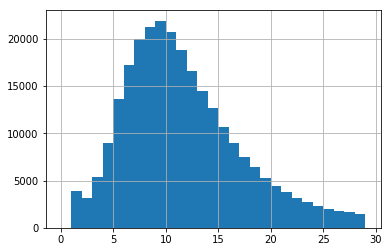

In [14]:
hist = orders["pay_time.min"].hist(bins=range(0,30,1))
print("Pay time (using first_try_pay_at)")

Delivery time


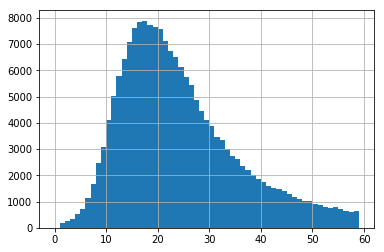

In [15]:
hist = orders["deliver_time.min"].hist(bins=range(0,60,1))
print("Delivery time")

In [16]:
orders.to_csv("100-order-time-pick-pay-deliver.csv")
print("Saved %d orders for training..." % len(orders))

Saved 280025 orders for training...


In [17]:
orders.tail(5000).to_csv("100-order-time-pick-pay-deliver-tail5k.csv")
print("Saved 5K orders for training...")

Saved 5K orders for training...
